In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("merc.xlsx")
print(df.head(3))
print(df.tail(3))

   year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
       year  price transmission  mileage  tax   mpg  engineSize
13116  2019  30999    Automatic    11612  145  41.5         2.1
13117  2019  37990    Automatic     2426  145  45.6         2.0
13118  2019  54999    Automatic     2075  145  52.3         2.9


In [3]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [5]:
df=pd.get_dummies(df,columns=["transmission"])
#df=df.drop(["transmission"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        13119 non-null  int64  
 1   price       13119 non-null  int64  
 2   mileage     13119 non-null  int64  
 3   tax         13119 non-null  int64  
 4   mpg         13119 non-null  float64
 5   engineSize  13119 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 615.1 KB


<Figure size 400x500 with 0 Axes>

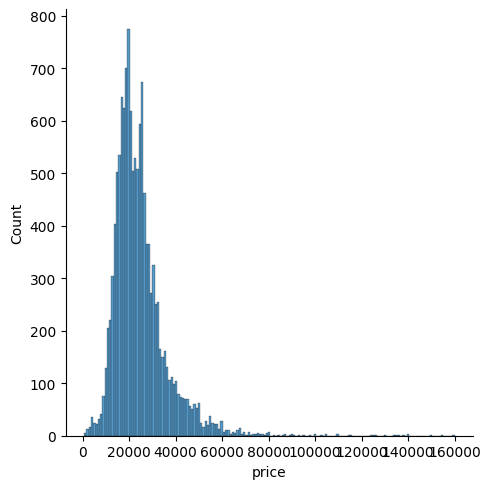

In [7]:
plt.figure(figsize=(4,5))
sns.displot(df["price"])

In [8]:
print(df["year"].value_counts().sort_index())

year
1970       1
1997       1
1998       4
1999       1
2000       3
2001      10
2002       9
2003       7
2004      13
2005       9
2006       8
2007      22
2008      16
2009      17
2010      38
2011      38
2012      57
2013     292
2014     491
2015     991
2016    1971
2017    2381
2018    1467
2019    4553
2020     719
Name: count, dtype: int64


In [9]:
df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

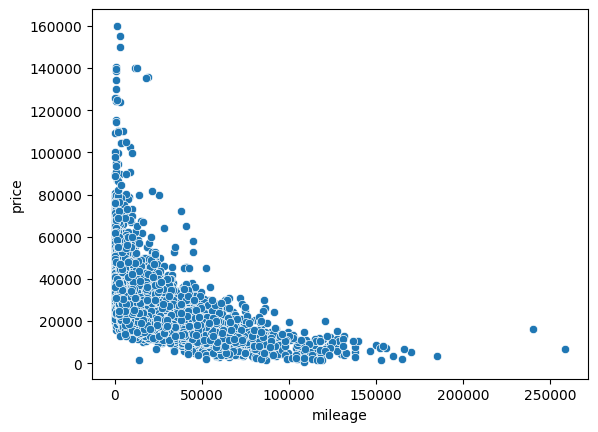

In [10]:
sns.scatterplot(x="mileage",y="price",data=df)

In [11]:
dfUpdated=df.sort_values("price",ascending=False).iloc[131:]

In [12]:
dfUpdated

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


<Figure size 400x500 with 0 Axes>

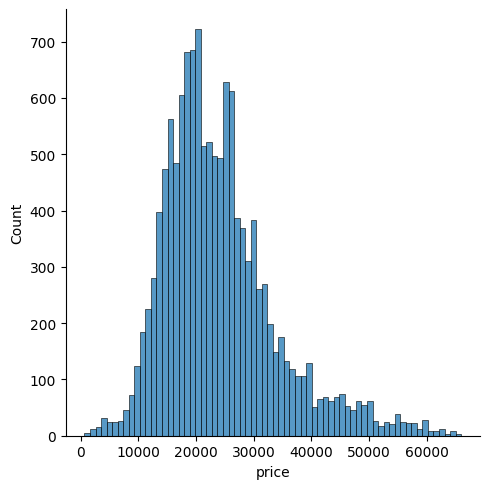

In [13]:
plt.figure(figsize=(4,5))
sns.displot(dfUpdated["price"])

In [14]:
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [15]:
dfUpdated.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [16]:
dfUpdated=dfUpdated[dfUpdated.year !=1970].sort_values(["year"],ascending=True)

In [17]:
dfUpdated.sort_values(["year"],ascending=True)

,year,price,mileage,tax,mpg,engineSize
11912,1997,9995,76000,255,28.2,3.2
11860,1998,10450,49000,255,28.2,3.2
11808,1998,1990,113557,265,32.1,2.3
11764,1998,1990,99300,265,32.1,2.3
11794,1998,19990,43534,265,23.3,6.0
...,...,...,...,...,...,...
9255,2020,58789,1000,145,32.5,2.9
4462,2020,28491,1329,145,55.4,2.0
10635,2020,27798,245,145,55.4,2.0
2955,2020,49980,4001,145,26.4,3.0


In [18]:
dfUpdated.groupby(["year"]).mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [19]:
y=dfUpdated["price"]
x=dfUpdated.drop(["price"],axis=1)

In [20]:
y=y.values if hasattr(y,"values") else y
x=x.values if hasattr(x,"values") else x

In [21]:
print(y)

[ 9995 10450  1990 ... 24995 26890 33469]


In [22]:
print(x)

[[1.99700e+03 7.60000e+04 2.55000e+02 2.82000e+01 3.20000e+00]
 [1.99800e+03 4.90000e+04 2.55000e+02 2.82000e+01 3.20000e+00]
 [1.99800e+03 1.13557e+05 2.65000e+02 3.21000e+01 2.30000e+00]
 ...
 [2.02000e+03 9.00000e+00 1.45000e+02 4.71000e+01 1.30000e+00]
 [2.02000e+03 2.49800e+03 1.45000e+02 3.72000e+01 1.60000e+00]
 [2.02000e+03 1.00000e+03 1.45000e+02 5.43000e+01 1.60000e+00]]


In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=44)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train,y_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [26]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 677440640.0000 - val_loss: 664853632.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 681196800.0000 - val_loss: 664803584.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 689675840.0000 - val_loss: 664606144.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 687491200.0000 - val_loss: 663906176.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 684409216.0000 - val_loss: 661798976.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 660230592.0000 - val_loss: 656588544.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 676235008.0000 - val_loss: 645549952.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 656916800.0000 - val_loss: 624912896.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 630564864.0000 - val_loss: 590131392.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 597223104.000

In [27]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

float64
int64
float64
int64


In [28]:
lossData=pd.DataFrame(model.history.history)

In [29]:
print(lossData)

            loss     val_loss
0    682106304.0  664853632.0
1    682078528.0  664803584.0
2    681973952.0  664606144.0
3    681580288.0  663906176.0
4    680303040.0  661798976.0
..           ...          ...
295   19917258.0   18563428.0
296   19913648.0   18568324.0
297   19901024.0   18575972.0
298   19940074.0   18549070.0
299   19893336.0   18559700.0

[300 rows x 2 columns]


<Axes: >

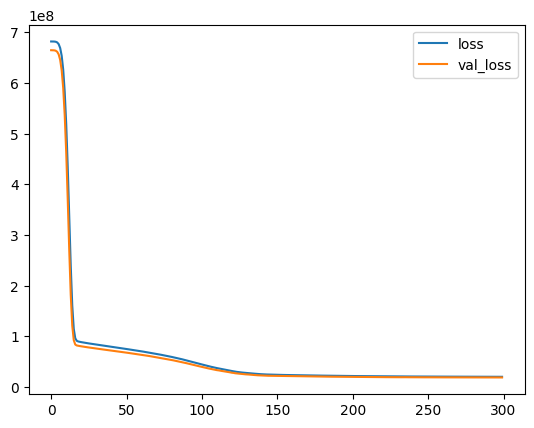

In [30]:
lossData.plot()

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

predictArr=model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


In [32]:
resultDf=pd.DataFrame(np.column_stack((y_test,predictArr)),columns=["Real Value","Model Predict"])

In [33]:
resultDf["Difference"]=resultDf["Real Value"]-resultDf["Model Predict"]

In [34]:
mean_absolute_error(y_test,predictArr)

3088.7919921875

In [35]:
mean_squared_error(y_test,predictArr)

18559700.0

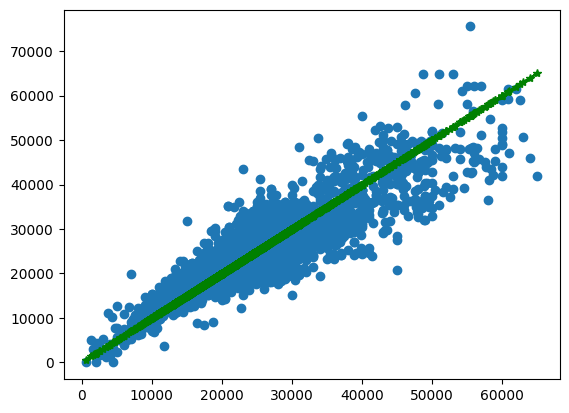

In [36]:
#plt.figure(figsize=(7,7),dpi=300)
plt.scatter(y_test,predictArr)
plt.plot(y_test,y_test,"g-*")